In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [10]:
#import csv file
salary_data = pd.read_csv('Data Files/Clean_Payroll.csv')
salary_data.head()

,Unnamed: 0,Tm,Attendance,Attend/G,Est. Payroll,Year
0,0,ARI,2091685,25823,59984226,2006
1,1,ATL,2550524,31488,90156876,2006
2,2,BAL,2153139,26582,72585582,2006
3,3,BOS,2930588,36180,120099824,2006
4,4,CHC,3123215,38558,94424499,2006


In [11]:
#define x and y points
Attendance = salary_data['Attend/G']
Payroll = salary_data['Est. Payroll']

correlation = Attendance.corr(Payroll)

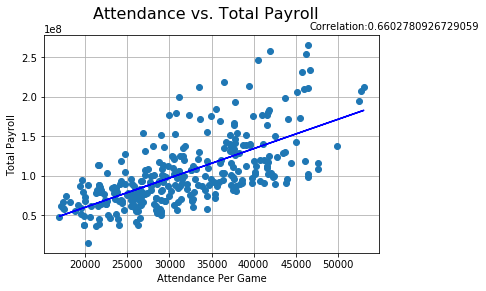

In [12]:
#create line plot for attendance vs. payroll
(slope, intercept, _, _, _) = linregress(Attendance, Payroll)
fit = slope * Attendance + intercept

fig, ax = plt.subplots()

fig.suptitle("Attendance vs. Total Payroll", fontsize=16)

ax.set_xlabel("Attendance Per Game")
ax.set_ylabel("Total Payroll")

ax.plot(Attendance, Payroll, linewidth=0, marker='o')

ax.plot(Attendance, fit, 'b')

plt.figtext(.74,.9,(f"Correlation:{correlation}"))
plt.grid(True)
plt.savefig('AttendanceVersusPayroll_Plot')

In [13]:
grouped_salary_data= salary_data.groupby(['Tm'])
grouped_salary_data = grouped_salary_data.mean()
grouped_salary_data

,Unnamed: 0,Attendance,Attend/G,Est. Payroll,Year
Tm,,,,,
ARI,150.000000,2.156396e+06,26622.181818,6.820516e+07,2011.0
ATL,151.000000,2.402792e+06,29664.181818,9.333008e+07,2011.0
BAL,152.000000,2.094682e+06,25986.090909,9.339868e+07,2011.0
BOS,153.000000,2.980117e+06,36791.545455,1.523773e+08,2011.0
CHC,154.000000,3.023161e+06,37367.454545,1.131352e+08,2011.0
CHW,155.000000,2.137219e+06,26351.272727,1.074607e+08,2011.0
CIN,156.000000,2.173045e+06,26862.545455,8.299061e+07,2011.0
CLE,157.000000,1.730625e+06,21417.090909,7.145165e+07,2011.0
COL,158.000000,2.617715e+06,32285.000000,7.784608e+07,2011.0


In [14]:
Attendance = []
Attendance.append(grouped_salary_data['Attend/G'])

Payroll = []
Payroll.append(grouped_salary_data['Est. Payroll'])

Payroll = Payroll[0]
Attendance = pd.to_numeric(Attendance[0])

correlation = Attendance.corr(Payroll)

In [15]:
team_list = []
team_list = salary_data.Tm.unique()
print(team_list)


['ARI' 'ATL' 'BAL' 'BOS' 'CHC' 'CHW' 'CIN' 'CLE' 'COL' 'DET' 'HOU' 'KCR'
 'LAA' 'LAD' 'MIL' 'MIN' 'NYM' 'NYY' 'OAK' 'PHI' 'PIT' 'SDP' 'SEA' 'SFG'
 'STL' 'TEX' 'TOR' 'WSN']


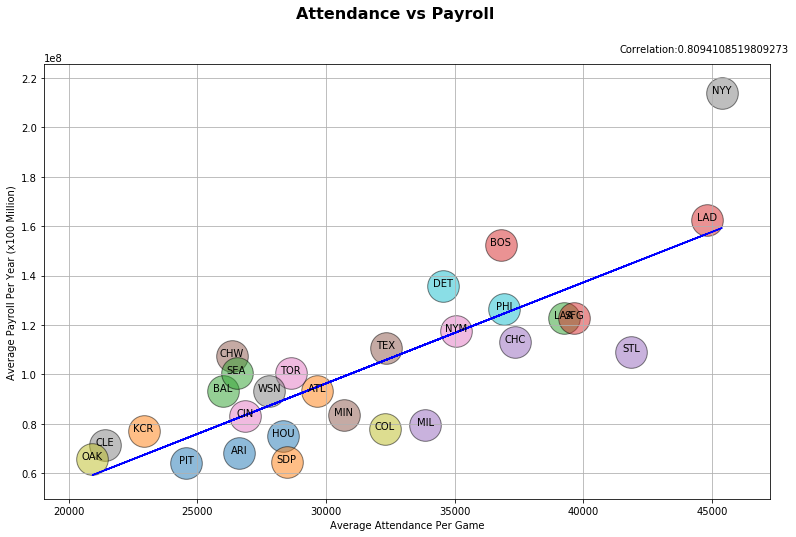

In [16]:
x = [x for x in Attendance]
y = [y for y in Payroll]
teams = [team for team in team_list]

group = pd.DataFrame(dict(x=x,y=y,teams=teams))

fig, ax = plt.subplots(facecolor ='w', figsize=(13,8))

for key, row in group.iterrows():
    ax.scatter(row['x'], row['y'],alpha = 0.5, s=1000, edgecolors = 'black')
    ax.annotate(row['teams'],ha='center',xy = (row['x'], row['y']))

(slope, intercept, _, _, _) = linregress(Attendance, Payroll)
fit = slope * Attendance + intercept
ax.plot(Attendance, fit, 'b')

plt.figtext(.74,.9,(f"Correlation:{correlation}"))
plt.grid(True)

fig.suptitle("Attendance vs Payroll", fontsize=16, fontweight="bold")
ax.set_xlabel('Average Attendance Per Game')
ax.set_ylabel('Average Payroll Per Year (x100 Million)')
plt.savefig('Grouped_Payroll_Plot')